In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas
import math
import random
import cugraph
import cudf

In [3]:
df=cudf.read_csv("../Graph_Data_Storage/homo.csv")

df['weights'] = 1

print(df.head())

df_g=cugraph.from_cudf_edgelist(df,source="source", destination="target", edge_attr="weights")

adj=cugraph.to_numpy_matrix(df_g)

   source  target  weights
0       0      50        1
1       1      50        1
2       2      50        1
3       3      50        1
4       4      50        1


In [4]:
n=np.shape(adj)[0]

n = np.shape(adj)[0]

eig_values, eig_vectors = scipy.linalg.eig(adj)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eig_values)[::-1]
sorted_eig_values = eig_values[sorted_indices]
sorted_eig_vectors = eig_vectors[:, sorted_indices]

k = 25

x = sorted_eig_vectors[:, :k]

print(x)

val = adj @ x
print(np.shape(x))


[[-0.02846204+0.00000000e+00j  0.03446813+0.00000000e+00j
  -0.05611504-2.48675847e-02j ... -0.03908801+2.90884703e-03j
  -0.03908801-2.90884703e-03j  0.02451878-1.24049480e-02j]
 [-0.06955008+0.00000000e+00j -0.09115954+0.00000000e+00j
   0.02805461+1.34167801e-02j ...  0.02569747-8.38601989e-03j
   0.02569747+8.38601989e-03j -0.00209541+2.83805142e-02j]
 [-0.07226666+0.00000000e+00j  0.05163047+0.00000000e+00j
  -0.08973667-6.70055036e-02j ...  0.01146428-4.44962928e-04j
   0.01146428+4.44962928e-04j  0.05160901+2.21885358e-02j]
 ...
 [-0.01281689+0.00000000e+00j  0.00686931+0.00000000e+00j
  -0.02352595-1.99071826e-02j ... -0.01861852+1.37716921e-02j
  -0.01861852-1.37716921e-02j  0.01732079-9.59059210e-03j]
 [-0.00749932+0.00000000e+00j  0.01212521+0.00000000e+00j
  -0.00103942-3.57626636e-03j ...  0.00880017-5.79962919e-03j
   0.00880017+5.79962919e-03j  0.00643461-7.82214292e-05j]
 [-0.01218536+0.00000000e+00j  0.01101563+0.00000000e+00j
  -0.01088666-9.02948382e-03j ...  0.00798

In [8]:
pcc = np.sqrt(np.multiply((val),(val))@np.ones(k))
vertices = (-pcc).argsort()
ordered_pcc = np.zeros(shape=np.shape(vertices))
ordered_pcc[:,:k]=1
print(vertices)
print(ordered_pcc)


[[ 439  215  231 ... 1806 1766 1761]]
[[1. 1. 1. ... 0. 0. 0.]]


In [9]:
adj_list = cugraph.to_numpy_array(df_g)

/tmp/ipykernel_1389290/2553091250.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='PCC Score')


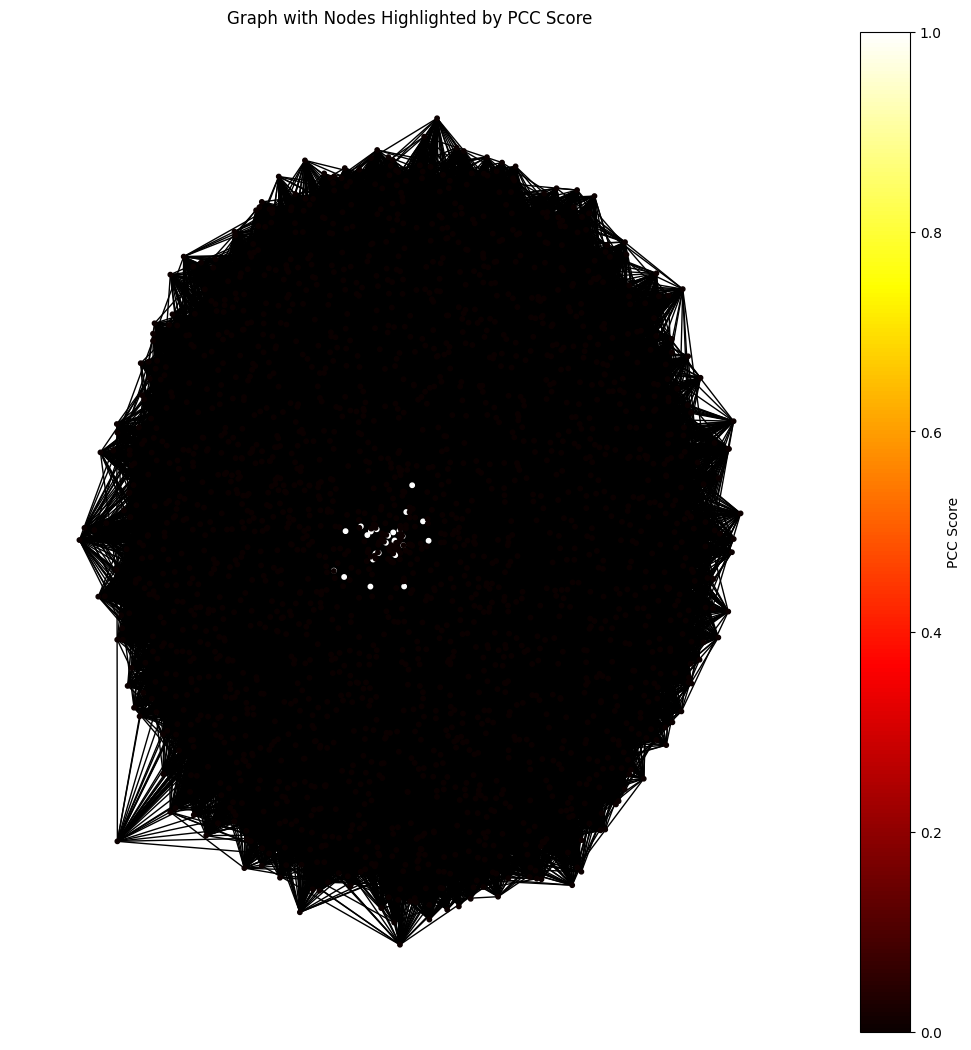

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

pcc = np.abs(pcc)
# Create a heatmap of the PCC scores

# Create a graph from the adjacency matrix
data = pd.read_csv('../Graph_Data_Storage/homo.csv')
# Read the edgelist of the NetScience network
G = nx.from_pandas_edgelist(data, data.columns[0], data.columns[1])

# Set the node colors based on the PCC scores
node_colors = ordered_pcc.flat
fig = plt.figure(figsize=(10, 10))  # Set the size of the figure
# Draw the graph with smaller nodes and without labels
pos = nx.spring_layout(G)  # Define the layout of the graph
nx.draw(G, pos, node_color=node_colors, cmap='hot', with_labels=False, node_size=10)

# Add a colorbar to show the PCC scores
sm = plt.cm.ScalarMappable(cmap='hot')
sm.set_array(node_colors)
plt.colorbar(sm, label='PCC Score')

# Set the title and labels
plt.title('Graph with Nodes Highlighted by PCC Score')
plt.xlabel('Nodes')
plt.ylabel('PCC Score')

plt.show()
